In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [3]:
query = '''SELECT f.rental_duration, f.rental_rate, f.length, f.rating, fc.category_id FROM film f
JOIN film_category fc
USING (film_id);'''

data = pd.read_sql_query(query, engine)
data.head()

,rental_duration,rental_rate,length,rating,category_id
0,6,0.99,113,PG,1
1,3,4.99,129,R,1
2,5,2.99,168,NC-17,1
3,6,0.99,68,NC-17,1
4,6,2.99,129,G,1


In [4]:
# Create temp table

sql = '''CREATE TEMPORARY TABLE rentedmay AS (
  SELECT film_id, f.title FROM rental r
JOIN inventory i USING (inventory_id)
JOIN film f USING (film_id)
WHERE rental_date LIKE '%%2005-05%%'
GROUP BY film_id
ORDER BY rental_date
);'''
engine.execute(sql)

In [5]:
# Use temp table with left join to get NaNs in Column title for movies that havn't been rented in May

query2 = '''SELECT f.rental_duration, f.rental_rate, f.length, f.rating, fc.category_id, film_id, re.title FROM film f
JOIN film_category fc
USING (film_id)
LEFT JOIN rentedmay re
USING (film_id)
ORDER BY film_id;'''

data2 = pd.read_sql_query(query2, engine)

data2.head()

,rental_duration,rental_rate,length,rating,category_id,film_id,title
0,6,0.99,86,PG,6,1,ACADEMY DINOSAUR
1,3,4.99,48,G,11,2,None
2,7,2.99,50,NC-17,6,3,ADAPTATION HOLES
3,5,2.99,117,G,11,4,AFFAIR PREJUDICE
4,6,2.99,130,G,8,5,AFRICAN EGG


In [6]:
# data2['title'] = data2['title'].fillna('FALSE')

In [7]:
# data2['title'] = data2['title'].replace(['None'], 'False')
# data2
import numpy as np

data.isna().sum()
data2.info(verbose=True)
data2['title'] = data2['title'].replace(np.nan, 0)
data2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rental_duration  1000 non-null   int64  
 1   rental_rate      1000 non-null   float64
 2   length           1000 non-null   int64  
 3   rating           1000 non-null   object 
 4   category_id      1000 non-null   int64  
 5   film_id          1000 non-null   int64  
 6   title            686 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


,rental_duration,rental_rate,length,rating,category_id,film_id,title
0,6,0.99,86,PG,6,1,ACADEMY DINOSAUR
1,3,4.99,48,G,11,2,0
2,7,2.99,50,NC-17,6,3,ADAPTATION HOLES
3,5,2.99,117,G,11,4,AFFAIR PREJUDICE
4,6,2.99,130,G,8,5,AFRICAN EGG
...,...,...,...,...,...,...,...
995,6,0.99,183,G,6,996,0
996,4,0.99,179,NC-17,12,997,0
997,6,0.99,105,NC-17,11,998,ZHIVAGO CORE
998,5,2.99,101,R,3,999,ZOOLANDER FICTION


In [8]:
import numpy as np
# data2['May'] = np.where((data2['title'] != 'False'), 'TRUE', 'FALSE')
# data2

data2['May']=np.where((data2['title'].isin([0])),'False', 'True')
data2

,rental_duration,rental_rate,length,rating,category_id,film_id,title,May
0,6,0.99,86,PG,6,1,ACADEMY DINOSAUR,True
1,3,4.99,48,G,11,2,0,False
2,7,2.99,50,NC-17,6,3,ADAPTATION HOLES,True
3,5,2.99,117,G,11,4,AFFAIR PREJUDICE,True
4,6,2.99,130,G,8,5,AFRICAN EGG,True
...,...,...,...,...,...,...,...,...
995,6,0.99,183,G,6,996,0,False
996,4,0.99,179,NC-17,12,997,0,False
997,6,0.99,105,NC-17,11,998,ZHIVAGO CORE,True
998,5,2.99,101,R,3,999,ZOOLANDER FICTION,True


In [9]:
data2['May'].value_counts()

True     686
False    314
Name: May, dtype: int64

In [10]:
data = data2.drop('title', axis=1)
data = data.drop('film_id', axis=1)
data

,rental_duration,rental_rate,length,rating,category_id,May
0,6,0.99,86,PG,6,True
1,3,4.99,48,G,11,False
2,7,2.99,50,NC-17,6,True
3,5,2.99,117,G,11,True
4,6,2.99,130,G,8,True
...,...,...,...,...,...,...
995,6,0.99,183,G,6,False
996,4,0.99,179,NC-17,12,False
997,6,0.99,105,NC-17,11,True
998,5,2.99,101,R,3,True


In [16]:
data['category_id'] = data['category_id'].astype('object')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

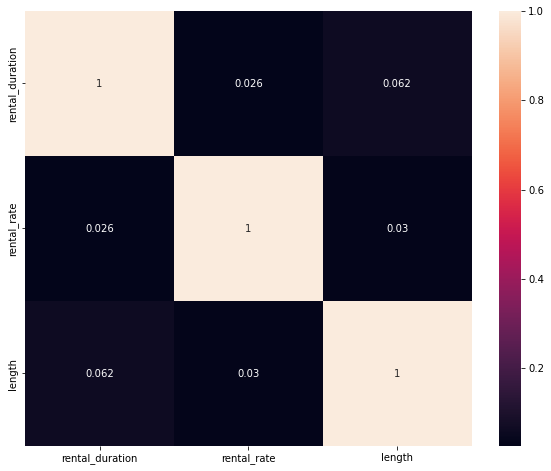

In [18]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
y = data['May']
X = data.drop('May', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [21]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_duration,rental_rate,length
0,0.50,1.0,0.769784
1,0.75,0.0,0.151079
2,0.00,0.5,0.258993
3,0.50,1.0,0.223022
4,0.25,0.0,0.733813


In [22]:
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'category_id'],
                             drop_first=True)
X_train_cat.head()

C:\Users\a\AppData\Local\Temp\ipykernel_8200\3700926296.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)
C:\Users\a\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,category_id_11,category_id_12,category_id_13,category_id_14,category_id_15,category_id_16
46,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
789,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
722,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [24]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [25]:
X_test_num = X_test.select_dtypes(include = np.number)


In [26]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [28]:
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating', 'category_id'],
                            drop_first=True)

display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
X_train_cat.columns.equals(X_test_cat.columns)

C:\Users\a\AppData\Local\Temp\ipykernel_8200\2595087680.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)
C:\Users\a\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


[('rating_NC-17', 'rating_NC-17'),
 ('rating_PG', 'rating_PG'),
 ('rating_PG-13', 'rating_PG-13'),
 ('rating_R', 'rating_R'),
 ('category_id_2', 'category_id_2'),
 ('category_id_3', 'category_id_3'),
 ('category_id_4', 'category_id_4'),
 ('category_id_5', 'category_id_5'),
 ('category_id_6', 'category_id_6'),
 ('category_id_7', 'category_id_7'),
 ('category_id_8', 'category_id_8'),
 ('category_id_9', 'category_id_9'),
 ('category_id_10', 'category_id_10'),
 ('category_id_11', 'category_id_11'),
 ('category_id_12', 'category_id_12'),
 ('category_id_13', 'category_id_13'),
 ('category_id_14', 'category_id_14'),
 ('category_id_15', 'category_id_15'),
 ('category_id_16', 'category_id_16')]

True

In [29]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [30]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.695

In [31]:
# Way more movies have been rented in May 2005 than havn't been, quite unequal

print(y_test.value_counts())

True     138
False     62
Name: May, dtype: int64
